## PlayFair Cipher


In [1]:
def generate_key_matrix(key):
    key = key.upper().replace('J', 'I')
    matrix = []
    used_chars = set()

    for char in key:
        if char not in used_chars and char.isalpha():
            matrix.append(char)
            used_chars.add(char)

    for char in 'ABCDEFGHIKLMNOPQRSTUVWXYZ':
        if char not in used_chars:
            matrix.append(char)
            used_chars.add(char)

    return [matrix[i:i+5] for i in range(0, 25, 5)]

def find_position(matrix, char):
    for i, row in enumerate(matrix):
        if char in row:
            return i, row.index(char)
    return None

def playfair_encrypt(plaintext, key):
    matrix = generate_key_matrix(key)
    plaintext = plaintext.upper().replace('J', 'I').replace(' ', '')
    if len(plaintext) % 2 != 0:
        plaintext += 'X'

    ciphertext = ''
    for i in range(0, len(plaintext), 2):
        a, b = plaintext[i], plaintext[i+1]
        row_a, col_a = find_position(matrix, a)
        row_b, col_b = find_position(matrix, b)

        if row_a == row_b:
            ciphertext += matrix[row_a][(col_a + 1) % 5]
            ciphertext += matrix[row_b][(col_b + 1) % 5]
        elif col_a == col_b:
            ciphertext += matrix[(row_a + 1) % 5][col_a]
            ciphertext += matrix[(row_b + 1) % 5][col_b]
        else:
            ciphertext += matrix[row_a][col_b]
            ciphertext += matrix[row_b][col_a]

    return ciphertext

def playfair_decrypt(ciphertext, key):
    matrix = generate_key_matrix(key)
    ciphertext = ciphertext.upper().replace('J', 'I').replace(' ', '')

    plaintext = ''
    for i in range(0, len(ciphertext), 2):
        a, b = ciphertext[i], ciphertext[i+1]
        row_a, col_a = find_position(matrix, a)
        row_b, col_b = find_position(matrix, b)

        if row_a == row_b:
            plaintext += matrix[row_a][(col_a - 1) % 5]
            plaintext += matrix[row_b][(col_b - 1) % 5]
        elif col_a == col_b:
            plaintext += matrix[(row_a - 1) % 5][col_a]
            plaintext += matrix[(row_b - 1) % 5][col_b]
        else:
            plaintext += matrix[row_a][col_b]
            plaintext += matrix[row_b][col_a]

    return plaintext

In [2]:
key = "playfair example"
plaintext = "hide the gold in the tree stump"
ciphertext = playfair_encrypt(plaintext, key)
decrypted_text = playfair_decrypt(ciphertext, key)

print(f"Plaintext: {plaintext}")
print(f"Ciphertext: {ciphertext}")
print(f"Decrypted Text: {decrypted_text}")

Plaintext: hide the gold in the tree stump
Ciphertext: BMODZBXDNABEKUDMUIXXKZZRYI
Decrypted Text: HIDETHEGOLDINTHETREESTUMPX


## Vigenere Cipher

In [5]:
def generate_vigenere_table():
    table = []
    for i in range(26):
        row = [(chr((i + j) % 26 + ord('A'))) for j in range(26)]
        table.append(row)
    return table

def vigenere_encrypt(plaintext, key):
    table = generate_vigenere_table()
    plaintext = plaintext.upper().replace(' ', '')
    key = key.upper().replace(' ', '')
    key = (key * (len(plaintext) // len(key) + 1))[:len(plaintext)]

    ciphertext = ''
    for p, k in zip(plaintext, key):
        if p.isalpha():
            row = ord(k) - ord('A')
            col = ord(p) - ord('A')
            ciphertext += table[row][col]
        else:
            ciphertext += p

    return ciphertext

def vigenere_decrypt(ciphertext, key):
    table = generate_vigenere_table()
    ciphertext = ciphertext.upper().replace(' ', '')
    key = key.upper().replace(' ', '')
    key = (key * (len(ciphertext) // len(key) + 1))[:len(ciphertext)]

    plaintext = ''
    for c, k in zip(ciphertext, key):
        if c.isalpha():
            row = ord(k) - ord('A')
            col = table[row].index(c)
            plaintext += chr(col + ord('A'))
        else:
            plaintext += c

    return plaintext

key = "VIGENERE"
plaintext = "ATTACK AT DAWN"
ciphertext = vigenere_encrypt(plaintext, key)
decrypted_text = vigenere_decrypt(ciphertext, key)

print(f"Plaintext: {plaintext}")
print(f"Ciphertext: {ciphertext}")
print(f"Decrypted Text: {decrypted_text}")

Plaintext: ATTACK AT DAWN
Ciphertext: VBZEPORXYICR
Decrypted Text: ATTACKATDAWN


## Hill Cipher

In [6]:
import numpy as np

def create_key_matrix(key, n):
    key = key.upper().replace(' ', '')
    key_matrix = []
    for i in range(n):
        row = [ord(key[i * n + j]) % 65 for j in range(n)]
        key_matrix.append(row)
    return np.array(key_matrix)

def mod_inverse(matrix, modulus):
    det = int(np.round(np.linalg.det(matrix)))
    det_inv = pow(det, -1, modulus)
    matrix_mod_inv = det_inv * np.round(det * np.linalg.inv(matrix)).astype(int) % modulus
    return matrix_mod_inv

def hill_encrypt(plaintext, key):
    n = int(len(key) ** 0.5)
    key_matrix = create_key_matrix(key, n)
    plaintext = plaintext.upper().replace(' ', '')
    if len(plaintext) % n != 0:
        plaintext += 'X' * (n - len(plaintext) % n)

    ciphertext = ''
    for i in range(0, len(plaintext), n):
        block = [ord(char) % 65 for char in plaintext[i:i+n]]
        encrypted_block = np.dot(key_matrix, block) % 26
        ciphertext += ''.join(chr(num + 65) for num in encrypted_block)

    return ciphertext

def hill_decrypt(ciphertext, key):
    n = int(len(key) ** 0.5)
    key_matrix = create_key_matrix(key, n)
    key_matrix_inv = mod_inverse(key_matrix, 26)
    ciphertext = ciphertext.upper().replace(' ', '')

    plaintext = ''
    for i in range(0, len(ciphertext), n):
        block = [ord(char) % 65 for char in ciphertext[i:i+n]]
        decrypted_block = np.dot(key_matrix_inv, block) % 26
        plaintext += ''.join(chr(int(num) + 65) for num in decrypted_block)

    return plaintext

# Example usage
key = "GYBNQKURP"
plaintext = "ACT"
ciphertext = hill_encrypt(plaintext, key)
decrypted_text = hill_decrypt(ciphertext, key)

print(f"Plaintext: {plaintext}")
print(f"Ciphertext: {ciphertext}")
print(f"Decrypted Text: {decrypted_text}")

Plaintext: ACT
Ciphertext: POH
Decrypted Text: ACT


## vernam Cipher

In [10]:
def vernam_encrypt(plaintext, key):
    if len(plaintext) != len(key):
        raise ValueError("The length of the plaintext and the key must be the same")

    ciphertext = ''.join(chr(ord(p) ^ ord(k)) for p, k in zip(plaintext, key))
    return ''.join(format(ord(c), '02x') for c in ciphertext)

def vernam_decrypt(ciphertext, key):
    if len(ciphertext) % 2 != 0:
        raise ValueError("The length of the ciphertext must be even")

    ciphertext = ''.join(chr(int(ciphertext[i:i+2], 16)) for i in range(0, len(ciphertext), 2))
    if len(ciphertext) != len(key):
        raise ValueError("The length of the ciphertext and the key must be the same")

    plaintext = ''.join(chr(ord(c) ^ ord(k)) for c, k in zip(ciphertext, key))
    return plaintext

# Example usage
plaintext = "HELLO"
key = "XMCKL"
ciphertext = vernam_encrypt(plaintext, key)
decrypted_text = vernam_decrypt(ciphertext, key)

print(f"Plaintext: {plaintext}")
print(f"Ciphertext: {ciphertext}")
print(f"Decrypted Text: {decrypted_text}")

Plaintext: HELLO
Ciphertext: 10080f0703
Decrypted Text: HELLO


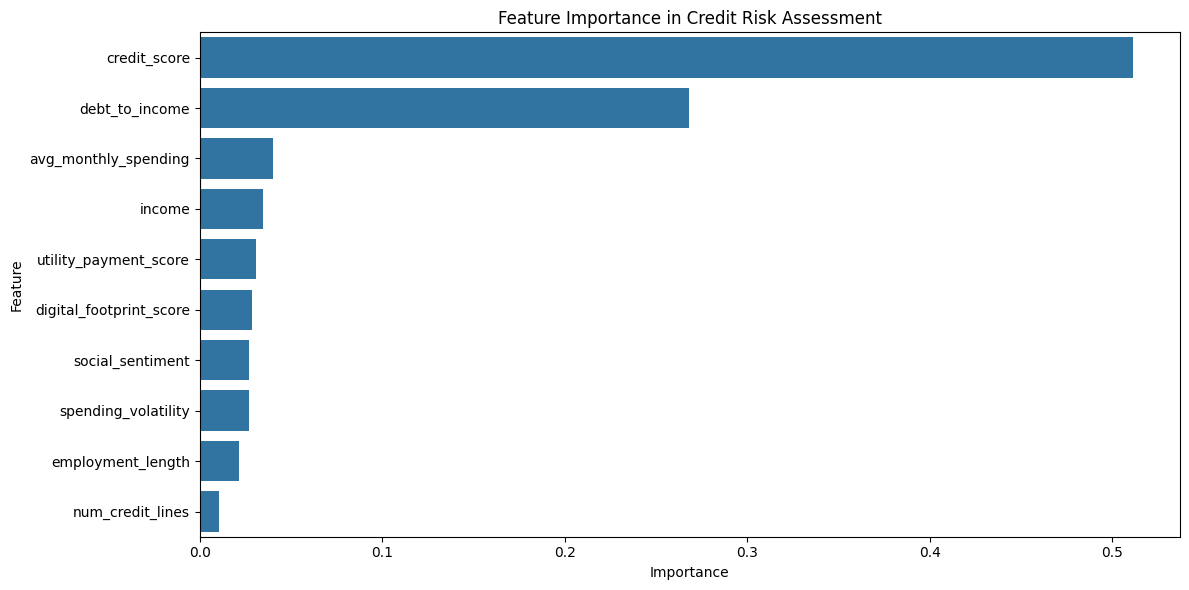


Risk Assessment Results:
Risk Score: 94.00
Risk Level: Low Risk
Default Probability: 0.06


In [6]:
# Cell 1 - Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from textblob import TextBlob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Cell 2 - Define CreditRiskAssessment Class
class CreditRiskAssessment:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = None

    def preprocess_traditional_data(self, data):
        """Process traditional financial data"""
        traditional_features = {
            'income': data.get('monthly_income', 0),
            'credit_score': data.get('credit_score', 0),
            'debt_to_income': data.get('total_debt', 0) / data.get('monthly_income', 1),
            'employment_length': data.get('employment_years', 0),
            'num_credit_lines': data.get('credit_lines', 0)
        }
        return pd.DataFrame([traditional_features])

    def preprocess_alternative_data(self, data):
        """Process alternative data sources"""
        # Social Media Sentiment
        social_posts = data.get('social_media_posts', [])
        sentiment_scores = [TextBlob(post).sentiment.polarity for post in social_posts]
        avg_sentiment = np.mean(sentiment_scores) if sentiment_scores else 0

        # Utility Payments
        utility_payments = data.get('utility_payments', {})
        utility_score = sum(1 for payment in utility_payments.values() if payment == 'on_time') / \
                       len(utility_payments) if utility_payments else 0

        # Transactions
        transactions = data.get('transaction_history', [])
        avg_monthly_spending = np.mean([t['amount'] for t in transactions]) if transactions else 0
        expense_regularity = np.std([t['amount'] for t in transactions]) if transactions else 0

        alternative_features = {
            'social_sentiment': avg_sentiment,
            'utility_payment_score': utility_score,
            'avg_monthly_spending': avg_monthly_spending,
            'spending_volatility': expense_regularity,
            'digital_footprint_score': data.get('digital_footprint', 0)
        }
        return pd.DataFrame([alternative_features])

    def train_model(self, X_train, y_train):
        """Train the Random Forest model and fit the scaler"""
        self.feature_names = X_train.columns

        # Fit and transform the training data with the scaler
        X_train_scaled = self.scaler.fit_transform(X_train)

        # Train the model with scaled data
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(X_train_scaled, y_train)

    def calculate_feature_importance(self, X):
        """Calculate feature importance"""
        if self.model is None:
            raise ValueError("Model must be trained first")
        importance = self.model.feature_importances_
        return dict(zip(self.feature_names, importance))

    def predict_risk(self, traditional_data, alternative_data):
        """Predict credit risk score"""
        if self.model is None or self.scaler is None:
            raise ValueError("Model and scaler must be trained first")

        trad_features = self.preprocess_traditional_data(traditional_data)
        alt_features = self.preprocess_alternative_data(alternative_data)
        combined_features = pd.concat([trad_features, alt_features], axis=1)

        # Ensure all columns match training data
        missing_cols = set(self.feature_names) - set(combined_features.columns)
        for col in missing_cols:
            combined_features[col] = 0
        combined_features = combined_features[self.feature_names]

        # Transform features using the fitted scaler
        scaled_features = self.scaler.transform(combined_features)

        risk_prob = self.model.predict_proba(scaled_features)[0]
        risk_score = (1 - risk_prob[1]) * 100

        feature_importance = self.calculate_feature_importance(combined_features)

        return {
            'risk_score': risk_score,
            'default_probability': risk_prob[1],
            'feature_importance': feature_importance,
            'risk_level': self._get_risk_level(risk_score)
        }

    def _get_risk_level(self, risk_score):
        """Convert score to risk level"""
        if risk_score >= 80:
            return 'Low Risk'
        elif risk_score >= 60:
            return 'Moderate Risk'
        elif risk_score >= 40:
            return 'High Risk'
        else:
            return 'Very High Risk'

# Cell 3 - Generate Synthetic Training Data
def generate_synthetic_data(n_samples=1000):
    np.random.seed(42)

    # Create features
    X = pd.DataFrame({
        'income': np.random.normal(5000, 1000, n_samples),
        'credit_score': np.random.normal(700, 50, n_samples),
        'debt_to_income': np.random.uniform(0.1, 0.6, n_samples),
        'employment_length': np.random.uniform(0, 20, n_samples),
        'num_credit_lines': np.random.randint(1, 10, n_samples),
        'social_sentiment': np.random.uniform(-1, 1, n_samples),
        'utility_payment_score': np.random.uniform(0, 1, n_samples),
        'avg_monthly_spending': np.random.normal(3000, 500, n_samples),
        'spending_volatility': np.random.uniform(100, 1000, n_samples),
        'digital_footprint_score': np.random.uniform(0, 1, n_samples)
    })

    # Create target
    y = (X['debt_to_income'] > 0.4) & (X['credit_score'] < 650)
    y = y.astype(int)

    return X, y

# Cell 4 - Sample Data for Testing
sample_traditional_data = {
    'monthly_income': 5000,
    'credit_score': 720,
    'total_debt': 15000,
    'employment_years': 5,
    'credit_lines': 3
}

sample_alternative_data = {
    'social_media_posts': [
        "Just got promoted at work!",
        "Excited to start my new business venture"
    ],
    'utility_payments': {
        'electricity': 'on_time',
        'water': 'on_time',
        'gas': 'late'
    },
    'transaction_history': [
        {'amount': 1000, 'category': 'rent'},
        {'amount': 500, 'category': 'groceries'},
        {'amount': 200, 'category': 'entertainment'}
    ],
    'digital_footprint': 0.75
}

# Cell 5 - Train and Test Model
def run_analysis():
    # Generate data
    X, y = generate_synthetic_data()

    # Initialize system
    risk_system = CreditRiskAssessment()

    # Train model (this will also fit the scaler)
    risk_system.train_model(X, y)

    # Get risk assessment
    risk_assessment = risk_system.predict_risk(sample_traditional_data,
                                             sample_alternative_data)

    # Plot feature importance
    importance_df = pd.DataFrame({
        'Feature': list(risk_assessment['feature_importance'].keys()),
        'Importance': list(risk_assessment['feature_importance'].values())
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance in Credit Risk Assessment')
    plt.tight_layout()
    plt.show()

    # Print results
    print("\nRisk Assessment Results:")
    print(f"Risk Score: {risk_assessment['risk_score']:.2f}")
    print(f"Risk Level: {risk_assessment['risk_level']}")
    print(f"Default Probability: {risk_assessment['default_probability']:.2f}")

    return risk_system, risk_assessment

# Cell 6 - Run Analysis
risk_system, risk_assessment = run_analysis()

Random Forest Cross-Validation Score: 0.9950
Gradient Boosting Cross-Validation Score: 0.9960


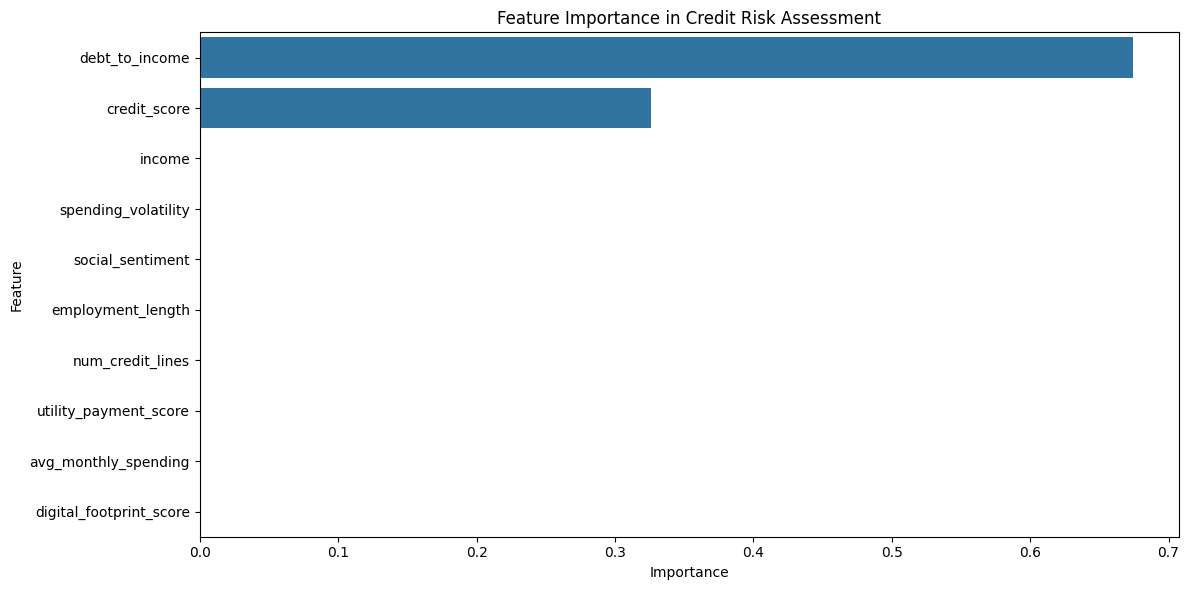

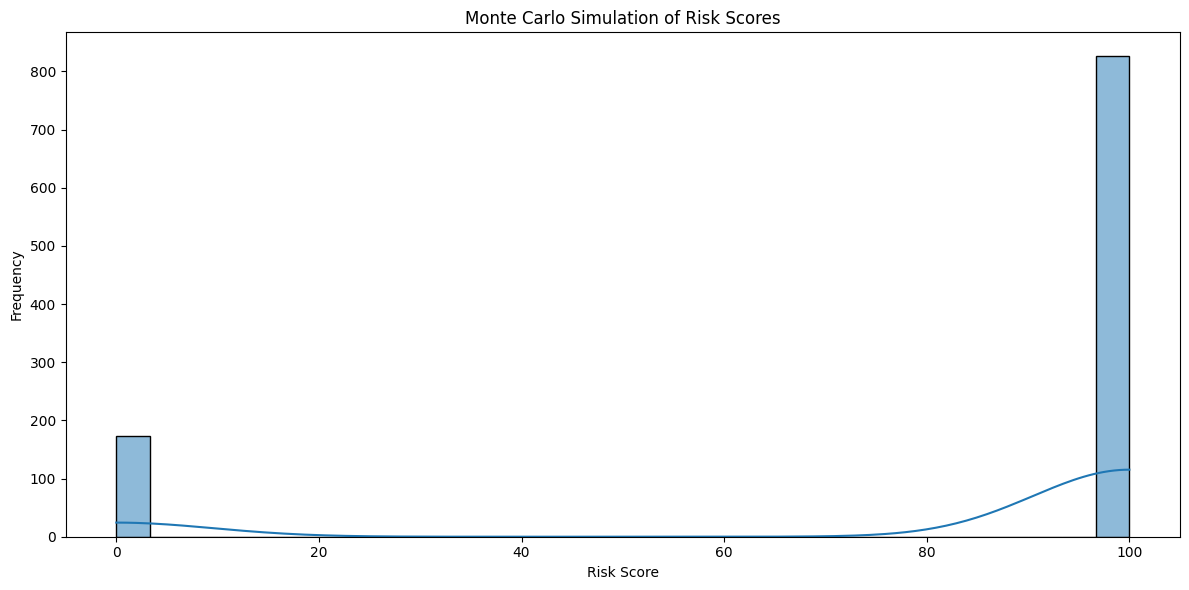


Risk Assessment Results:
Risk Score: 100.00
Risk Level: Low Risk
Default Probability: 0.00

Monte Carlo Simulation Results:
Mean Risk Score: 82.60
Standard Deviation of Risk Scores: 37.91


In [24]:
# Cell 1 - Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from textblob import TextBlob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Cell 2 - Define CreditRiskAssessment Class
class CreditRiskAssessment:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = None

    def preprocess_traditional_data(self, data):
        """Process traditional financial data"""
        traditional_features = {
            'income': data.get('monthly_income', 0),
            'credit_score': data.get('credit_score', 0),
            'debt_to_income': data.get('total_debt', 0) / data.get('monthly_income', 1),
            'employment_length': data.get('employment_years', 0),
            'num_credit_lines': data.get('credit_lines', 0)
        }
        return pd.DataFrame([traditional_features])

    def preprocess_alternative_data(self, data):
        """Process alternative data sources"""
        # Social Media Sentiment
        social_posts = data.get('social_media_posts', [])
        sentiment_scores = [TextBlob(post).sentiment.polarity for post in social_posts]
        avg_sentiment = np.mean(sentiment_scores) if sentiment_scores else 0

        # Utility Payments
        utility_payments = data.get('utility_payments', {})
        utility_score = sum(1 for payment in utility_payments.values() if payment == 'on_time') / \
                       len(utility_payments) if utility_payments else 0

        # Transactions
        transactions = data.get('transaction_history', [])
        avg_monthly_spending = np.mean([t['amount'] for t in transactions]) if transactions else 0
        expense_regularity = np.std([t['amount'] for t in transactions]) if transactions else 0

        alternative_features = {
            'social_sentiment': avg_sentiment,
            'utility_payment_score': utility_score,
            'avg_monthly_spending': avg_monthly_spending,
            'spending_volatility': expense_regularity,
            'digital_footprint_score': data.get('digital_footprint', 0)
        }
        return pd.DataFrame([alternative_features])

    def train_model(self, X_train, y_train):
        """Train the best model using cross-validation"""
        self.feature_names = X_train.columns

        # Scale the training data
        X_train_scaled = self.scaler.fit_transform(X_train)

        # Evaluate multiple models and select the best one based on cross-validation score
        models = {
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
        }

        best_model_name = None
        best_score = 0

        for name, model in models.items():
            scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
            mean_score = scores.mean()
            print(f"{name} Cross-Validation Score: {mean_score:.4f}")
            if mean_score > best_score:
                best_score = mean_score
                best_model_name = name
                self.model = model.fit(X_train_scaled, y_train)

    def calculate_feature_importance(self, X):
        """Calculate feature importance"""
        if self.model is None:
            raise ValueError("Model must be trained first")

        importance = self.model.feature_importances_
        return dict(zip(self.feature_names, importance))

    def predict_risk(self, traditional_data, alternative_data):
        """Predict credit risk score"""
        if self.model is None or self.scaler is None:
            raise ValueError("Model and scaler must be trained first")

        trad_features = self.preprocess_traditional_data(traditional_data)
        alt_features = self.preprocess_alternative_data(alternative_data)

        combined_features = pd.concat([trad_features, alt_features], axis=1)

        # Ensure all columns match training data
        missing_cols = set(self.feature_names) - set(combined_features.columns)

        for col in missing_cols:
            combined_features[col] = 0

        combined_features = combined_features[self.feature_names]

        # Transform features using the fitted scaler
        scaled_features = self.scaler.transform(combined_features)

        risk_prob = self.model.predict_proba(scaled_features)[0]

        risk_score = (1 - risk_prob[1]) * 100

        feature_importance = self.calculate_feature_importance(combined_features)

        return {
            'risk_score': risk_score,
            'default_probability': risk_prob[1],
            'feature_importance': feature_importance,
            'risk_level': self._get_risk_level(risk_score)
        }

    def _get_risk_level(self, risk_score):
        """Convert score to risk level"""
        if risk_score >= 80:
            return 'Low Risk'
        elif risk_score >= 60:
            return 'Moderate Risk'
        elif risk_score >= 40:
            return 'High Risk'
        else:
            return 'Very High Risk'

    def monte_carlo_simulation(self, traditional_data, alternative_data, n_simulations=1000):
        """Run Monte Carlo simulations to assess risk variability"""

        # Vectorize the simulation of traditional data
        trad_data = np.array([traditional_data[key] for key in traditional_data])
        trad_simulations = np.random.normal(trad_data, trad_data * 0.1, (n_simulations, len(trad_data)))

        # Vectorize the simulation of alternative data
        alt_data = {
            'social_media_posts': alternative_data['social_media_posts'],
            'utility_payments': {k: np.random.choice(['on_time', 'late'], n_simulations) for k in alternative_data['utility_payments']},
            'transaction_history': [{'amount': np.random.normal(t['amount'], t['amount'] * 0.1, n_simulations), 'category': t['category']} for t in alternative_data['transaction_history']],
            'digital_footprint': np.random.uniform(0, 1, n_simulations)
        }

        results = []
        for i in range(n_simulations):
            simulated_traditional_data = {key: trad_simulations[i, j] for j, key in enumerate(traditional_data.keys())}
            simulated_alternative_data = {
                'social_media_posts': alt_data['social_media_posts'],
                'utility_payments': {k: alt_data['utility_payments'][k][i] for k in alt_data['utility_payments']},
                'transaction_history': [{'amount': alt_data['transaction_history'][j]['amount'][i], 'category': alt_data['transaction_history'][j]['category']} for j in range(len(alt_data['transaction_history']))],
                'digital_footprint': alt_data['digital_footprint'][i]
            }
            result = self.predict_risk(simulated_traditional_data, simulated_alternative_data)
            results.append(result['risk_score'])

        return results
# Cell 3 - Generate Synthetic Training Data
def generate_synthetic_data(n_samples=1000):
    np.random.seed(42)

    # Create features
    X = pd.DataFrame({
        'income': np.random.normal(5000, 1000, n_samples),
        'credit_score': np.random.normal(700, 50, n_samples),
        'debt_to_income': np.random.uniform(0.1, 0.6, n_samples),
        'employment_length': np.random.uniform(0, 20, n_samples),
        'num_credit_lines': np.random.randint(1, 10, n_samples),
        'social_sentiment': np.random.uniform(-1, 1, n_samples),
        'utility_payment_score': np.random.uniform(0, 1, n_samples),
        'avg_monthly_spending': np.random.normal(3000, 500, n_samples),
        'spending_volatility': np.random.uniform(100, 1000, n_samples),
        'digital_footprint_score': np.random.uniform(0, 1, n_samples)
    })

    # Create target
    y = (X['debt_to_income'] > 0.4) & (X['credit_score'] < 650)
    y = y.astype(int)

    return X, y

# Cell 4 - Sample Data for Testing
sample_traditional_data = {
    'monthly_income': 5000,
    'credit_score': 720,
    'total_debt': 15000,
    'employment_years': 5,
    'credit_lines': 3
}

sample_alternative_data = {
    'social_media_posts': [
       "Just got promoted at work!",
       "Excited to start my new business venture"
   ],
   'utility_payments': {
       'electricity': 'on_time',
       'water': 'on_time',
       'gas': 'late'
   },
   'transaction_history': [
       {'amount': 1000, 'category': 'rent'},
       {'amount': 500, 'category': 'groceries'},
       {'amount': 200, 'category': 'entertainment'}
   ],
   'digital_footprint': 0.75
}

# Cell 5 - Train and Test Model with Monte Carlo Simulation
def run_analysis():
    # Generate data
    X, y = generate_synthetic_data()

    # Initialize system
    risk_system = CreditRiskAssessment()

    # Train model (this will also fit the scaler)
    risk_system.train_model(X, y)

    # Get risk assessment from sample data
    risk_assessment = risk_system.predict_risk(sample_traditional_data,
                                             sample_alternative_data)

    # Perform Monte Carlo simulation to assess variability in risk scores
    mc_results = risk_system.monte_carlo_simulation(sample_traditional_data,
                                                     sample_alternative_data)

    # Plot feature importance
    importance_df = pd.DataFrame({
       'Feature': list(risk_assessment['feature_importance'].keys()),
       'Importance': list(risk_assessment['feature_importance'].values())
   })

    importance_df.sort_values('Importance', ascending=False, inplace=True)

    plt.figure(figsize=(12,6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance in Credit Risk Assessment')
    plt.tight_layout()
    plt.show()

    # Plot Monte Carlo simulation results histogram
    plt.figure(figsize=(12,6))
    sns.histplot(mc_results, bins=30, kde=True)
    plt.title('Monte Carlo Simulation of Risk Scores')
    plt.xlabel('Risk Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Print results of the original assessment and Monte Carlo simulation statistics
    print("\nRisk Assessment Results:")
    print(f"Risk Score: {risk_assessment['risk_score']:.2f}")
    print(f"Risk Level: {risk_assessment['risk_level']}")
    print(f"Default Probability: {risk_assessment['default_probability']:.2f}")

    print(f"\nMonte Carlo Simulation Results:")
    print(f"Mean Risk Score: {np.mean(mc_results):.2f}")
    print(f"Standard Deviation of Risk Scores: {np.std(mc_results):.2f}")

    return risk_system, risk_assessment

# Cell 6 - Run Analysis
risk_system, risk_assessment = run_analysis()